Lab | Comparing regression models
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.


Exploring data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.shape
customer_df.head(5)

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.columns=['Customer_id', 'State', 'Customer_lifetime_value', 'Response', 'Coverage',
       'Education', 'Effective_date', 'Employment_status', 'Gender',
       'Income', 'Location_code', 'Marital_status', 'Monthly_premium_auto',
       'Months_since_last_claim', 'Months_since_policy_nception',
       'Number_of_open_complaints', 'Number_of_policies', 'Policy_type',
       'Policy', 'Renew_offer_type', 'Sales_channel', 'Total_claim_amount',
       'Vehicle_class', 'Vehicle_size']

In [5]:
# change effective date in to month only.
customer_df['Effective_date']= pd.to_datetime(customer_df['Effective_date'])


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer_id                   9134 non-null   object        
 1   State                         9134 non-null   object        
 2   Customer_lifetime_value       9134 non-null   float64       
 3   Response                      9134 non-null   object        
 4   Coverage                      9134 non-null   object        
 5   Education                     9134 non-null   object        
 6   Effective_date                9134 non-null   datetime64[ns]
 7   Employment_status             9134 non-null   object        
 8   Gender                        9134 non-null   object        
 9   Income                        9134 non-null   int64         
 10  Location_code                 9134 non-null   object        
 11  Marital_status                

In [7]:
customer_df.nunique()#this shows howmany distinct values in each column.The value above 1000 we are considered as continuous

Customer_id                     9134
State                              5
Customer_lifetime_value         8041
Response                           2
Coverage                           3
Education                          5
Effective_date                    59
Employment_status                  5
Gender                             2
Income                          5694
Location_code                      3
Marital_status                     3
Monthly_premium_auto             202
Months_since_last_claim           36
Months_since_policy_nception     100
Number_of_open_complaints          6
Number_of_policies                 9
Policy_type                        3
Policy                             9
Renew_offer_type                   4
Sales_channel                      4
Total_claim_amount              5106
Vehicle_class                      6
Vehicle_size                       3
dtype: int64

In [8]:
catagorical = customer_df.select_dtypes(exclude=[np.number])
catagorical.head(5)

,Customer_id,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
catagorical = catagorical.drop(['Customer_id'], axis=1)
catagorical.head(5)

,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
# extract continous and discrete variables
Continuous = customer_df[['Customer_lifetime_value','Income','Total_claim_amount']].astype(int)
Continuous
discrete = customer_df.drop(['Customer_id','Customer_lifetime_value','Income','Total_claim_amount'], axis=1)
discrete.head(5)

,Customer_lifetime_value,Income,Total_claim_amount
0,2763,56274,384
1,6979,0,1131
2,12887,48767,566
3,7645,0,529
4,2813,43836,138
...,...,...,...
9129,23405,71941,198
9130,3096,21604,379
9131,8163,0,790
9132,7524,21941,691


,State,Response,Coverage,Education,Effective_date,Employment_status,Gender,Location_code,Marital_status,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [11]:
Continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_lifetime_value  9134 non-null   int64
 1   Income                   9134 non-null   int64
 2   Total_claim_amount       9134 non-null   int64
dtypes: int64(3)
memory usage: 214.2 KB


In [12]:
discrete = discrete.select_dtypes(include=['int64'])
discrete

,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


Text(0.5, 0.98, 'Distribution of variables in violinplots')

<AxesSubplot:xlabel='Customer_lifetime_value'>

<AxesSubplot:xlabel='Income'>

<AxesSubplot:xlabel='Total_claim_amount'>

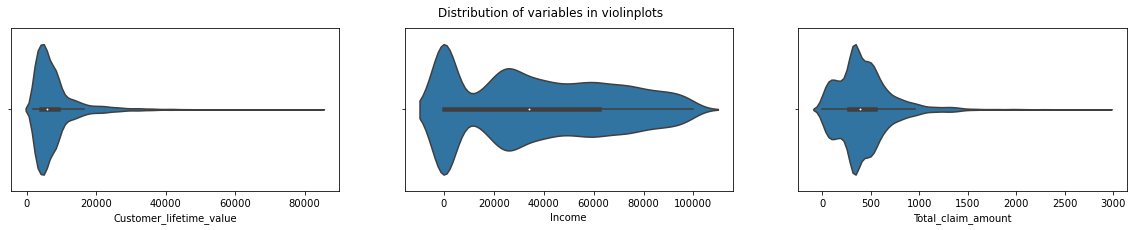

In [13]:
fig, axes = plt.subplots(1,3,  figsize=(20, 3))

fig.suptitle('Distribution of variables in violinplots')

sns.violinplot(ax=axes[0],data= Continuous, x= 'Customer_lifetime_value')
sns.violinplot(ax=axes[1],data= Continuous, x= 'Income')
sns.violinplot(ax=axes[2],data= Continuous, x= 'Total_claim_amount')

def log_transfom_clean(x):
    if np.isfinite(x) and x>=0:
        return np.log(x)
    else:
        return np.nan

In [14]:
for i in range(len(Continuous.columns)):
    iqr = np.percentile(Continuous.iloc[:,i],75) -  np.percentile(Continuous.iloc[:,i],25)
    upper_limit = np.percentile(Continuous.iloc[:,i],75) + 1.5*iqr
    Continuous = Continuous[Continuous.iloc[:,i] < upper_limit]
    Continuous

,Customer_lifetime_value,Income,Total_claim_amount
0,2763,56274,384
1,6979,0,1131
2,12887,48767,566
3,7645,0,529
4,2813,43836,138
...,...,...,...
9128,4100,47761,541
9130,3096,21604,379
9131,8163,0,790
9132,7524,21941,691


,Customer_lifetime_value,Income,Total_claim_amount
0,2763,56274,384
1,6979,0,1131
2,12887,48767,566
3,7645,0,529
4,2813,43836,138
...,...,...,...
9128,4100,47761,541
9130,3096,21604,379
9131,8163,0,790
9132,7524,21941,691


,Customer_lifetime_value,Income,Total_claim_amount
0,2763,56274,384
2,12887,48767,566
3,7645,0,529
4,2813,43836,138
5,8256,62902,159
...,...,...,...
9128,4100,47761,541
9130,3096,21604,379
9131,8163,0,790
9132,7524,21941,691


Text(0.5, 0.98, 'Distribution of variables in violinplots')

<AxesSubplot:xlabel='Customer_lifetime_value'>

<AxesSubplot:xlabel='Income'>

<AxesSubplot:xlabel='Total_claim_amount'>

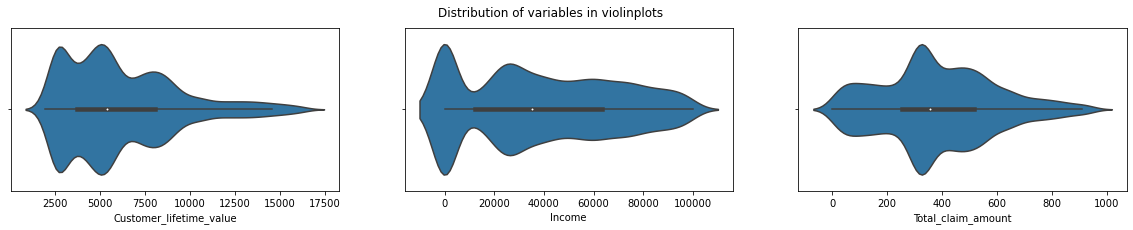

In [15]:
fig, axes = plt.subplots(1,3,  figsize=(20, 3))

fig.suptitle('Distribution of variables in violinplots')

sns.violinplot(ax=axes[0],data= Continuous, x= 'Customer_lifetime_value')
sns.violinplot(ax=axes[1],data= Continuous, x= 'Income')
sns.violinplot(ax=axes[2],data= Continuous, x= 'Total_claim_amount')



Text(0.5, 0.98, 'Distribution of variables in violinplots')

<AxesSubplot:xlabel='Monthly_premium_auto'>

<AxesSubplot:xlabel='Months_since_last_claim'>

<AxesSubplot:xlabel='Months_since_policy_nception'>

<AxesSubplot:xlabel='Number_of_open_complaints'>

<AxesSubplot:xlabel='Number_of_policies'>

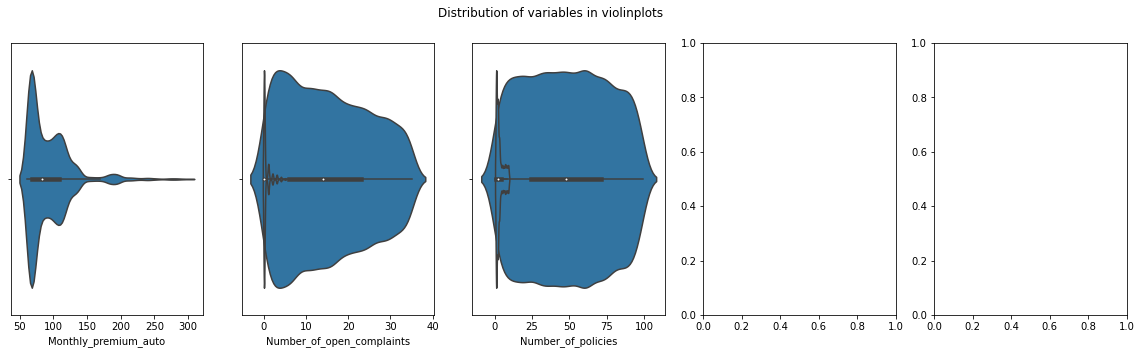

In [16]:
fig, axes = plt.subplots(1,5,  figsize=(20, 5))

fig.suptitle('Distribution of variables in violinplots')

sns.violinplot(ax=axes[0],data= discrete , x= 'Monthly_premium_auto')
sns.violinplot(ax=axes[1],data= discrete, x= 'Months_since_last_claim')
sns.violinplot(ax=axes[2],data= discrete , x= 'Months_since_policy_nception')
sns.violinplot(ax=axes[1],data= discrete , x= 'Number_of_open_complaints')
sns.violinplot(ax=axes[2],data= discrete, x= 'Number_of_policies')

In [17]:
X = pd.concat([Continuous, discrete], axis=1)
X 

,Customer_lifetime_value,Income,Total_claim_amount,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
0,2763.0,56274.0,384.0,69,32,5,0,1
1,NaN,NaN,NaN,94,13,42,0,8
2,12887.0,48767.0,566.0,108,18,38,0,2
3,7645.0,0.0,529.0,106,18,65,0,7
4,2813.0,43836.0,138.0,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,73,18,89,0,2
9130,3096.0,21604.0,379.0,79,14,28,0,1
9131,8163.0,0.0,790.0,85,9,37,3,2
9132,7524.0,21941.0,691.0,96,34,3,0,3


In [18]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Customer_lifetime_value,Income,Total_claim_amount,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
0,-1.069672,0.580066,-0.007706,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,NaN,NaN,NaN,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,2.109049,0.332533,0.867440,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,0.463173,-1.275491,0.689526,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-1.053973,0.169940,-1.190596,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


In [19]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_lifetime_value       7962 non-null   float64
 1   Income                        7962 non-null   float64
 2   Total_claim_amount            7962 non-null   float64
 3   Monthly_premium_auto          9134 non-null   float64
 4   Months_since_last_claim       9134 non-null   float64
 5   Months_since_policy_nception  9134 non-null   float64
 6   Number_of_open_complaints     9134 non-null   float64
 7   Number_of_policies            9134 non-null   float64
dtypes: float64(8)
memory usage: 571.0 KB


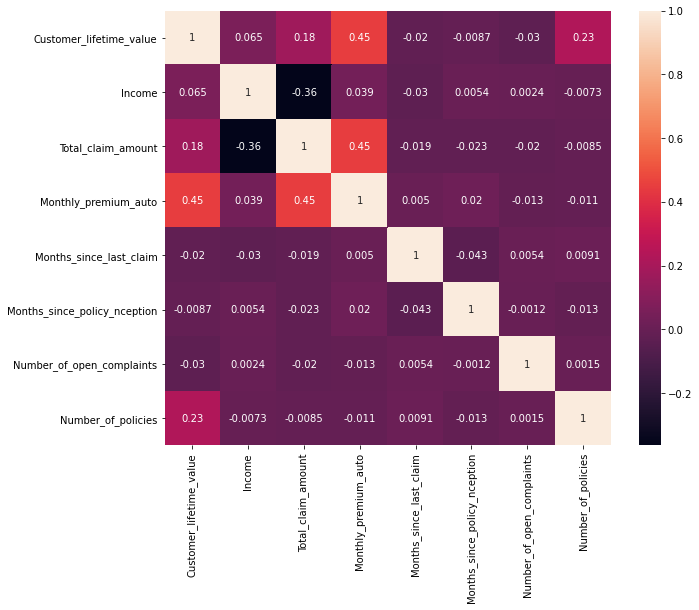

,Customer_lifetime_value,Income,Total_claim_amount,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies
Customer_lifetime_value,1.000000,0.065008,0.178845,0.447199,-0.019751,-0.008707,-0.030457,0.231888
Income,0.065008,1.000000,-0.364443,0.038608,-0.030372,0.005444,0.002447,-0.007312
Total_claim_amount,0.178845,-0.364443,1.000000,0.447139,-0.018883,-0.022757,-0.019950,-0.008492
Monthly_premium_auto,0.447199,0.038608,0.447139,1.000000,0.005026,0.020257,-0.013122,-0.011233
Months_since_last_claim,-0.019751,-0.030372,-0.018883,0.005026,1.000000,-0.042959,0.005354,0.009136
Months_since_policy_nception,-0.008707,0.005444,-0.022757,0.020257,-0.042959,1.000000,-0.001158,-0.013333
Number_of_open_complaints,-0.030457,0.002447,-0.019950,-0.013122,0.005354,-0.001158,1.000000,0.001498
Number_of_policies,0.231888,-0.007312,-0.008492,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [20]:
corr_matrix=X_scaled.corr(method='pearson')  # there is no variable has highly correlated with each other
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
corr_matrix

In [21]:
Continuous1.isnull().sum()
discrete.isnull().sum()
catagorical.isnull().sum()

NameError: name 'Continuous1' is not defined

In [ ]:
for i in range(len(catagorical.columns)):
        sns.countplot(catagorical.iloc[:,i])
        plt.show()

In [ ]:
catagorical

In [ ]:
# trying to find what are the variable has dependent with other  variables.
# using chi-squre test
#Ho: variables are independent
#H1:variables are dependent
col1=[]
col2=[]
P_value=[]

for i in range(len(catagorical.columns)-1):
    for e in range(len(catagorical.columns)):
        cross = pd.crosstab(catagorical[catagorical.columns[i]], catagorical[catagorical.columns[e]], margins = False)
        P =st.chi2_contingency(cross)
        print(catagorical.columns[i], 'Vs', catagorical.columns[e],'P-Value=',P[1])
        col1.append(catagorical.columns[i])
        col2.append(catagorical.columns[e])
        P_value.append(P[1])

In [ ]:
col1=pd.DataFrame(col1)
col2=pd.DataFrame(col2)
P_value=pd.DataFrame(P_value)

In [ ]:
P_values_df = pd.concat((col1, col2, P_value),axis=1)
P_values_df.columns = ['Column 1', 'Column 2', 'P_value']
P_values_df

In [ ]:
# P values are less than 0.05 and reject null hypothesis which means variables are dependent.
low_P_values=P_values_df[(P_values_df['P_value'] <= 0.05)]
low_P_values.drop_duplicates('P_value')

In [ ]:
low_P_values['Column 2'].value_counts()

In [ ]:
#dropping some variables which are not relevant to the target .
catagorical.drop(['Gender','Education','Response'] ,axis=1)

Lab | Comparing regression models
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.

In [22]:
onehot = catagorical[['State','Marital_status','Policy_type','Policy','Renew_offer_type','Sales_channel']]
onehotencoded = pd.get_dummies(onehot)
onehotencoded

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,Policy_type_Corporate Auto,Policy_type_Personal Auto,...,Policy_Special L2,Policy_Special L3,Renew_offer_type_Offer1,Renew_offer_type_Offer2,Renew_offer_type_Offer3,Renew_offer_type_Offer4,Sales_channel_Agent,Sales_channel_Branch,Sales_channel_Call Center,Sales_channel_Web
0,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9130,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
9131,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
9132,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [23]:
ordinal = catagorical[['Coverage','Employment_status','Location_code','Vehicle_size']]
ordinal

,Coverage,Employment_status,Location_code,Vehicle_size
0,Basic,Employed,Suburban,Medsize
1,Extended,Unemployed,Suburban,Medsize
2,Premium,Employed,Suburban,Medsize
3,Basic,Unemployed,Suburban,Medsize
4,Basic,Employed,Rural,Medsize
...,...,...,...,...
9129,Basic,Employed,Urban,Medsize
9130,Extended,Employed,Suburban,Medsize
9131,Extended,Unemployed,Suburban,Medsize
9132,Extended,Employed,Suburban,Large


In [24]:


ordinal = catagorical[['Coverage','Employment_status','Location_code','Vehicle_size']]

ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["Employment_status"] = catagorical["Employment_status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
ordinal['Location_code'] =catagorical['Location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['Vehicle_size'] =catagorical['Vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})

ordinal

<ipython-input-24-914f155fd60e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
<ipython-input-24-914f155fd60e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Employment_status"] = catagorical["Employment_status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
<ipython-input-24-914f155fd60e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Coverage,Employment_status,Location_code,Vehicle_size
0,0,4,1,1
1,1,3,1,1
2,2,4,1,1
3,0,3,1,1
4,0,4,0,1
...,...,...,...,...
9129,0,4,2,1
9130,1,4,1,1
9131,1,3,1,1
9132,1,4,1,2


In [26]:
num = pd.concat((ordinal,onehotencoded,discrete,Continuous), axis=1)
num

,Coverage,Employment_status,Location_code,Vehicle_size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,...,Sales_channel_Call Center,Sales_channel_Web,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies,Customer_lifetime_value,Income,Total_claim_amount
0,0,4,1,1,0,0,0,0,1,0,...,0,0,69,32,5,0,1,2763.0,56274.0,384.0
1,1,3,1,1,1,0,0,0,0,0,...,0,0,94,13,42,0,8,NaN,NaN,NaN
2,2,4,1,1,0,0,1,0,0,0,...,0,0,108,18,38,0,2,12887.0,48767.0,566.0
3,0,3,1,1,0,1,0,0,0,0,...,1,0,106,18,65,0,7,7645.0,0.0,529.0
4,0,4,0,1,0,0,0,0,1,0,...,0,0,73,12,44,0,1,2813.0,43836.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,4,2,1,0,1,0,0,0,0,...,0,1,73,18,89,0,2,NaN,NaN,NaN
9130,1,4,1,1,0,1,0,0,0,1,...,0,0,79,14,28,0,1,3096.0,21604.0,379.0
9131,1,3,1,1,0,1,0,0,0,0,...,0,0,85,9,37,3,2,8163.0,0.0,790.0
9132,1,4,1,2,0,1,0,0,0,0,...,0,0,96,34,3,0,3,7524.0,21941.0,691.0


In [29]:
num = num.dropna( axis=0, 
                    how='any')
num

,Coverage,Employment_status,Location_code,Vehicle_size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,...,Sales_channel_Call Center,Sales_channel_Web,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies,Customer_lifetime_value,Income,Total_claim_amount
0,0,4,1,1,0,0,0,0,1,0,...,0,0,69,32,5,0,1,2763.0,56274.0,384.0
2,2,4,1,1,0,0,1,0,0,0,...,0,0,108,18,38,0,2,12887.0,48767.0,566.0
3,0,3,1,1,0,1,0,0,0,0,...,1,0,106,18,65,0,7,7645.0,0.0,529.0
4,0,4,0,1,0,0,0,0,1,0,...,0,0,73,12,44,0,1,2813.0,43836.0,138.0
5,0,4,0,1,0,0,0,1,0,0,...,0,1,69,14,94,0,2,8256.0,62902.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,2,4,1,2,0,1,0,0,0,0,...,0,0,104,16,58,0,1,4100.0,47761.0,541.0
9130,1,4,1,1,0,1,0,0,0,1,...,0,0,79,14,28,0,1,3096.0,21604.0,379.0
9131,1,3,1,1,0,1,0,0,0,0,...,0,0,85,9,37,3,2,8163.0,0.0,790.0
9132,1,4,1,2,0,1,0,0,0,0,...,0,0,96,34,3,0,3,7524.0,21941.0,691.0


In [32]:
# regression model
y = num['Total_claim_amount']
X = num.drop(['Total_claim_amount'], axis=1)

In [30]:
Standardtransformer = StandardScaler().fit(num)
x_standardized = Standardtransformer.transform(num)
x_standardized.shape
x_standardized = pd.DataFrame(x_standardized,columns=num.columns)
x_standardized.head(2)

(7962, 40)

,Coverage,Employment_status,Location_code,Vehicle_size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,...,Sales_channel_Call Center,Sales_channel_Web,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_policies,Customer_lifetime_value,Income,Total_claim_amount
0,-0.706689,0.588766,0.03445,0.163642,-0.482784,-0.722752,-0.325556,-0.631121,3.236143,-0.41878,...,-0.492649,-0.412337,-0.737359,1.696270,-1.543970,-0.423498,-0.827505,-1.069672,0.580066,-0.007706
1,2.457019,0.588766,0.03445,0.163642,-0.482784,-0.722752,3.071665,-0.631121,-0.309010,-0.41878,...,-0.492649,-0.412337,0.792356,0.300682,-0.358793,-0.423498,-0.421704,2.109049,0.332533,0.867440


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [34]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [35]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.5076592151835405

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(mse)

21253.27405629505


In [37]:
import math
rmse = math.sqrt(mse)
print(rmse)

145.78502685905383


In [38]:
r2 = r2_score(y_test, predictions)
r2

0.5076592151835405

In [39]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
score = KNN.score(X_test, y_test)
score

0.09994097490729603

In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([-0.98506347, -7.19854141])

0.4162338898076593